In [2]:
#import library
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [55]:
raw_data = pd.read_csv('Main_sheet.csv',encoding='euc-kr')

In [166]:
raw_data.shape

(120013, 137)

In [56]:
del raw_data['Unnamed: 0']

In [59]:
#카테고리형 데이터 더미화 
data = raw_data
CAT1 = pd.get_dummies(data['법정동'],drop_first=True)
CAT2 = pd.get_dummies(data['type'],drop_first=True)
data.drop(['법정동','type'],axis=1,inplace=True)
data = pd.concat([data,CAT1,CAT2],axis=1)

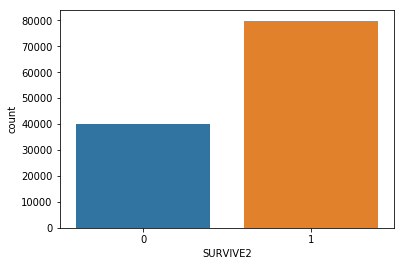

In [60]:
#TARGET 비율 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='SURVIVE2',data=data)

In [61]:
#샘플링 기법 함수
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE, ADASYN #쓰지말자 너무 오래걸리겠다
#Undersampling 
def undersampling(X_train,y_train):
    rus = RandomUnderSampler(return_indices=True)
    X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)
    X_resampled = pd.DataFrame(X_resampled)
    y_resampled = pd.Series(y_resampled)
    X_resampled.columns = X_train.columns
    return X_resampled,y_resampled
#Oversampling
def oversampling(X_train,y_train):
    rus = RandomOverSampler(return_indices=True)
    X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)
    X_resampled = pd.DataFrame(X_resampled)
    y_resampled = pd.Series(y_resampled)
    X_resampled.columns = X_train.columns
    return X_resampled,y_resampled
#SMOT 이건 너무 오래걸릴듯


In [62]:
#결과 보고 함수
def score_report(y_test,y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred,normalize=True)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) 
    print("TN",cnf_matrix[0,0])
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("Accuracy: ",accuracy)
    print("\n----------Classification Report------------------------------------")
    print(classification_report(y_test,y_pred))

In [63]:
def selectvar_chi2(df_train,n):
    selector = SelectKBest(chi2, k=n)
    selector.fit(df_train.drop('SURVIVE2',axis=1), df_train['SURVIVE2'])
    cols = selector.get_support(indices=True)
    col_name = df_train.drop('SURVIVE2',axis=1).columns[cols]
    X_new = df_train.drop('SURVIVE2',axis=1)[col_name]
    return X_new, col_name

1 feautures selected 
10 Fold CV accuracy:  [0.33294451 0.32961173 0.33469422 0.33630531 0.33097242 0.33472211
 0.33797184 0.3375552  0.33363886 0.33847179] 
10 Fold CV auc [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]

2 feautures selected 
10 Fold CV accuracy:  [0.33294451 0.32961173 0.33469422 0.42146488 0.33097242 0.3403883
 0.33797184 0.34105491 0.33363886 0.33847179] 
10 Fold CV auc [0.5        0.5        0.5        0.50341195 0.5        0.501661
 0.5        0.50118871 0.5        0.5       ]

3 feautures selected 
10 Fold CV accuracy:  [0.47075487 0.4691718  0.46758874 0.48037664 0.47162736 0.46446129
 0.47629364 0.46971086 0.47212732 0.47154404] 
10 Fold CV auc [0.5289059  0.52930477 0.52750606 0.53667153 0.53540577 0.52403477
 0.53392901 0.52819815 0.53364363 0.52904632]

4 feautures selected 
10 Fold CV accuracy:  [0.47375437 0.55082486 0.47017164 0.4723773  0.46712774 0.46904425
 0.4752104  0.46987751 0.47346054 0.4767936 ] 
10 Fold CV auc [0.52438565 0.55724557 0.51862283 0.5225

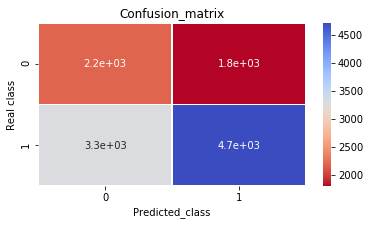

Accuracy:  0.5760706548908515

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.40      0.55      0.46      3996
           1       0.72      0.59      0.65      8006

   micro avg       0.58      0.58      0.58     12002
   macro avg       0.56      0.57      0.56     12002
weighted avg       0.62      0.58      0.59     12002

TP 4803
TN 2224
FP 1732
FN 3243


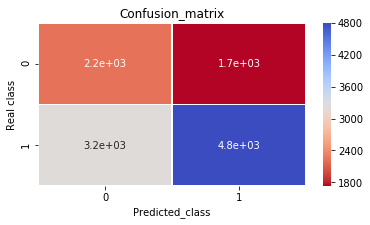

Accuracy:  0.5854857523746042

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.56      0.47      3956
           1       0.73      0.60      0.66      8046

   micro avg       0.59      0.59      0.59     12002
   macro avg       0.57      0.58      0.57     12002
weighted avg       0.63      0.59      0.60     12002

TP 4731
TN 2327
FP 1645
FN 3298


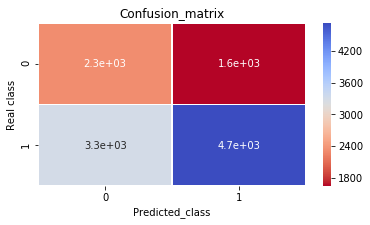

Accuracy:  0.5881176568619282

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.59      0.48      3972
           1       0.74      0.59      0.66      8029

   micro avg       0.59      0.59      0.59     12001
   macro avg       0.58      0.59      0.57     12001
weighted avg       0.63      0.59      0.60     12001

6 feautures selected 
10 Fold CV accuracy:  [0.57607065 0.58548575 0.5724046  0.58061828 0.58811766 0.57461878
 0.58528456 0.57678527 0.5756187  0.58045163] 
10 Fold CV auc [0.56942878 0.5795633  0.56458944 0.57656206 0.58754498 0.57126404
 0.57943661 0.57094035 0.57270206 0.5760157 ]

7 feautures selected 
10 Fold CV accuracy:  [0.57723713 0.58673554 0.57357107 0.58186818 0.58936755 0.57636864
 0.58686776 0.5756187  0.57661862 0.57886843] 
10 Fold CV auc [0.56973908 0.5803027  0.56472384 0.57738145 0.58809746 0.57214625
 0.58008926 0.57072572 0.57301588 0.57451852]



In [65]:
#로지스틱 회귀 최적 변수 개수 CV 검증
cv_acc_min = []
cv_auc_min = []
selected_logmodel = None
for nv in range(1,16):
    logit_acuuracy = np.zeros(10)
    logit_roc_auc = np.zeros(10)
    kf = KFold(10, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(kf.split(data)):
        df_train = data.iloc[idx_train]
        df_test = data.iloc[idx_test]

        #변수 선택(카이제곱)
        X_new, col_name = selectvar_chi2(df_train,nv)
        
        #샘플링 함수 선택
        X1, y1 = undersampling(X_new,df_train['SURVIVE2'])
        logmodel = LogisticRegression()
        logmodel.fit(X1,y1)

        y_pred = logmodel.predict(df_test.drop('SURVIVE2',axis=1)[col_name])
        
        #print(i,': ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
        kth_accuracy = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test['SURVIVE2'], y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        logit_acuuracy[i] = kth_accuracy
        logit_roc_auc[i] = roc_auc
        
        #Kfold 중 가장 좋은 성능의 모델 저장
        if (nv == 6) and (kth_accuracy >= max(logit_acuuracy)):
            selected_logmodel = logmodel
            score_report(df_test['SURVIVE2'],y_pred)
    print(nv,'feautures selected \n10 Fold CV accuracy: ',logit_acuuracy,'\n10 Fold CV auc',logit_roc_auc)
    cv_acc_min.append(min(logit_acuuracy))
    cv_auc_min.append(min(logit_roc_auc))
    print()

In [68]:
selected_logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

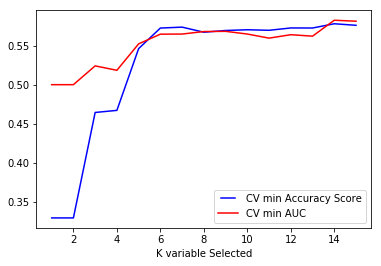

In [70]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(list(range(1,16)), cv_acc_min, 'b', label="CV min Accuracy Score")
line2, = plt.plot(list(range(1,16)), cv_auc_min, 'r', label="CV min AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("")
plt.xlabel("K variable Selected")
plt.show()

In [69]:
#Logistic Regression C parameter tuning.
cv_min = []
C_param_range = [0.001,0.01,0.1,1,10,100]
for j in C_param_range:
    logit_scores = np.zeros(10)
    kf = KFold(10, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(kf.split(data)):
        df_train = data.iloc[idx_train]
        df_test = data.iloc[idx_test]

        #변수 선택(카이제곱)
        X_new, col_name = selectvar_chi2(df_train,6)
        
        #샘플링 함수 선택
        X1, y1 = oversampling(X_new,df_train['SURVIVE2'])
        logmodel = LogisticRegression(C=j)
        logmodel.fit(X1,y1)

        y_pred = logmodel.predict(df_test.drop('SURVIVE2',axis=1)[col_name])
        
        #print(i,': ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
        kth_score = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
        logit_scores[i] = kth_score
        #score_report(df_test['SURVIVE2'],y_pred)
        
        #Kfold 중 가장 좋은 성능의 모델 저장
        #if (nv == 6) and (kth_score >= max(logit_scores)):
        #    selected_logmodel = logmodel
    print('c value:',j,'\n10 Fold CV Accuracy: ',logit_scores)
    cv_min.append(min(logit_scores))
    print()

c value: 0.001 
10 Fold CV Accuracy:  [0.57707049 0.58573571 0.57232128 0.58145155 0.58878427 0.5743688
 0.58653446 0.57428548 0.57703525 0.58028498]

c value: 0.01 
10 Fold CV Accuracy:  [0.57665389 0.58415264 0.57215464 0.5819515  0.58778435 0.5756187
 0.58595117 0.57611866 0.57570202 0.58070161]

c value: 0.1 
10 Fold CV Accuracy:  [0.57548742 0.58348609 0.57357107 0.58111824 0.5892009  0.57528539
 0.58578452 0.57611866 0.57711857 0.57978502]

c value: 1 
10 Fold CV Accuracy:  [0.57573738 0.58431928 0.57248792 0.58220148 0.58786768 0.57478543
 0.58486793 0.57320223 0.57578535 0.58070161]

c value: 10 
10 Fold CV Accuracy:  [0.57640393 0.58523579 0.57207132 0.57986834 0.58803433 0.57511874
 0.58570119 0.57653529 0.57611866 0.58078493]

c value: 100 
10 Fold CV Accuracy:  [0.57573738 0.58381936 0.57215464 0.58136822 0.58778435 0.57553537
 0.58428464 0.5756187  0.57578535 0.58078493]



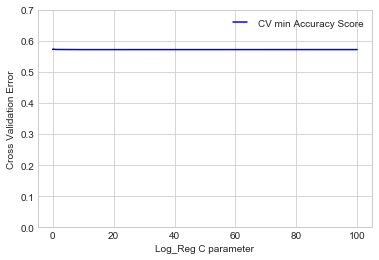

In [74]:
line1, = plt.plot([0.001,0.01,0.1,1,10,100], cv_min, 'b', label="CV min Accuracy Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Cross Validation Error")
plt.xlabel("Log_Reg C parameter")
plt.ylim((0, 0.7))
plt.show()

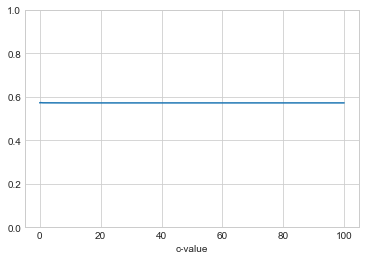

In [72]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('c-value')
x = [0.001,0.01,0.1,1,10,100]
ax.set_ylim([0, 1])
ax.plot(x,cv_min);

0.6452453248874012

TP 6613
TN 2622
FP 1374
FN 1393


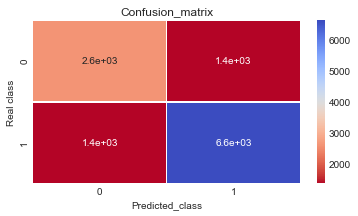

Accuracy:  0.769455090818197

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      3996
           1       0.83      0.83      0.83      8006

   micro avg       0.77      0.77      0.77     12002
   macro avg       0.74      0.74      0.74     12002
weighted avg       0.77      0.77      0.77     12002

TP 6632
TN 2594
FP 1362
FN 1414


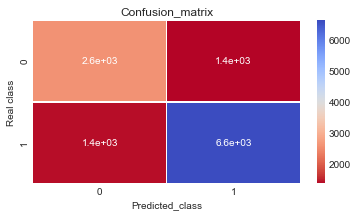

Accuracy:  0.7687052157973671

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      3956
           1       0.83      0.82      0.83      8046

   micro avg       0.77      0.77      0.77     12002
   macro avg       0.74      0.74      0.74     12002
weighted avg       0.77      0.77      0.77     12002

TP 6616
TN 2654
FP 1363
FN 1369


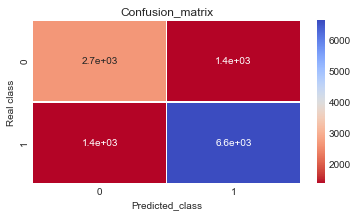

Accuracy:  0.7723712714547576

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4017
           1       0.83      0.83      0.83      7985

   micro avg       0.77      0.77      0.77     12002
   macro avg       0.74      0.74      0.74     12002
weighted avg       0.77      0.77      0.77     12002

TP 6572
TN 2734
FP 1302
FN 1393


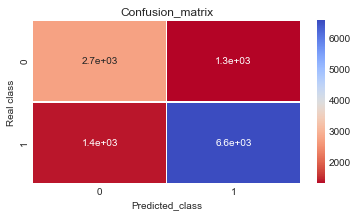

Accuracy:  0.775435380384968

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      4036
           1       0.83      0.83      0.83      7965

   micro avg       0.78      0.78      0.78     12001
   macro avg       0.75      0.75      0.75     12001
weighted avg       0.78      0.78      0.78     12001

TP 6614
TN 2608
FP 1364
FN 1415


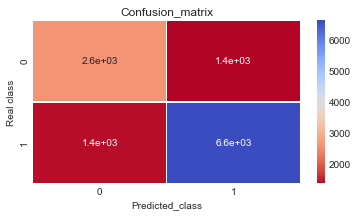

Accuracy:  0.7684359636696942

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      3972
           1       0.83      0.82      0.83      8029

   micro avg       0.77      0.77      0.77     12001
   macro avg       0.74      0.74      0.74     12001
weighted avg       0.77      0.77      0.77     12001

TP 6607
TN 2598
FP 1419
FN 1377


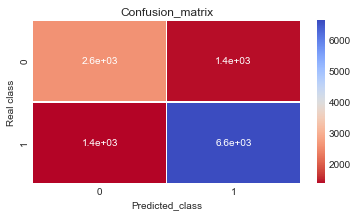

Accuracy:  0.7670194150487459

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      4017
           1       0.82      0.83      0.83      7984

   micro avg       0.77      0.77      0.77     12001
   macro avg       0.74      0.74      0.74     12001
weighted avg       0.77      0.77      0.77     12001

TP 6615
TN 2634
FP 1422
FN 1330


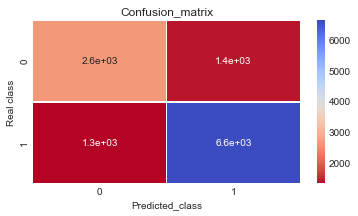

Accuracy:  0.7706857761853179

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4056
           1       0.82      0.83      0.83      7945

   micro avg       0.77      0.77      0.77     12001
   macro avg       0.74      0.74      0.74     12001
weighted avg       0.77      0.77      0.77     12001

TP 6653
TN 2621
FP 1430
FN 1297


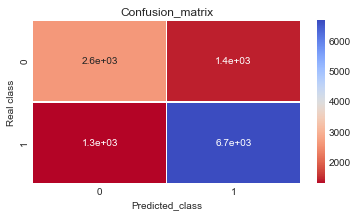

Accuracy:  0.7727689359220065

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      4051
           1       0.82      0.84      0.83      7950

   micro avg       0.77      0.77      0.77     12001
   macro avg       0.75      0.74      0.74     12001
weighted avg       0.77      0.77      0.77     12001

TP 6699
TN 2611
FP 1393
FN 1298


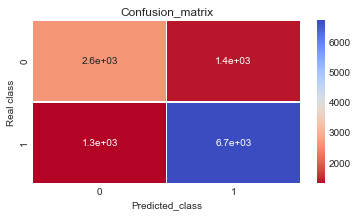

Accuracy:  0.7757686859428381

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      4004
           1       0.83      0.84      0.83      7997

   micro avg       0.78      0.78      0.78     12001
   macro avg       0.75      0.74      0.75     12001
weighted avg       0.77      0.78      0.78     12001

TP 6620
TN 2645
FP 1417
FN 1319


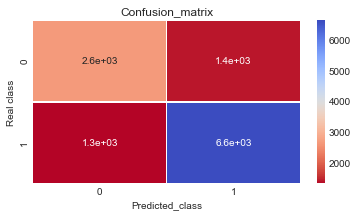

Accuracy:  0.7720189984167986

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      4062
           1       0.82      0.83      0.83      7939

   micro avg       0.77      0.77      0.77     12001
   macro avg       0.75      0.74      0.74     12001
weighted avg       0.77      0.77      0.77     12001

n_estimators:  100 acc: 0.7712664733640691 auc 0.7424600486302686


In [94]:
#Random Forest CV 검증

#n_estimate = [32, 64, 100, 200]
n_estimate = [100]

n_auc = []
n_acc = []
for j in n_estimate:
    forest_acc = np.zeros(10)
    forest_auc = np.zeros(10)
    kf = KFold(10, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(kf.split(data)):
        df_train = data.iloc[idx_train]
        df_test = data.iloc[idx_test]

        #샘플링 함수 선택 
        X1, y1 = oversampling(df_train.drop('SURVIVE2',axis=1),df_train['SURVIVE2'],)
        rf = RandomForestClassifier(n_estimators=j, oob_score=True, random_state=123456)
        rf.fit(X1,y1)


        y_pred = rf.predict(df_test.drop('SURVIVE2',axis=1))
        false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test['SURVIVE2'], y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        
        
        score_report(df_test['SURVIVE2'],y_pred)
        #너무 느려 ㅜ
        #print(i,' acc: ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
        #print(i,' auc: ',roc_auc)
        forest_acc[i] = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
        forest_auc[i] = roc_auc
        #score_report(df_test['SURVIVE2'],y_pred)
    n_auc.append(sum(forest_auc)/len(forest_auc))
    n_acc.append(sum(forest_acc)/len(forest_acc))
    print('n_estimators: ',j, 'acc:',sum(forest_acc)/len(forest_acc),'auc',sum(forest_auc)/len(forest_auc))

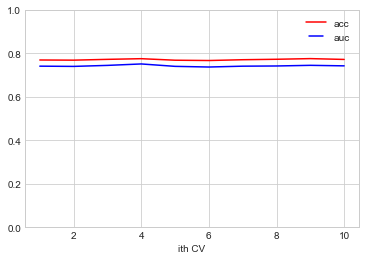

In [105]:
line1, = plt.plot([1,2,3,4,5,6,7,8,9,10], forest_acc, 'r', label="acc")
line1, = plt.plot([1,2,3,4,5,6,7,8,9,10], forest_auc, 'b', label="auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylim((0, 1))
plt.xlabel("ith CV")
plt.show()

In [77]:
#Random Forest CV 검증

#n_estimate = [32, 64, 100, 200]
n_estimate = [100]

n_auc = []
n_acc = []
for j in n_estimate:
    forest_acc = np.zeros(10)
    forest_auc = np.zeros(10)
    kf = KFold(10, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(kf.split(data)):
        df_train = data.iloc[idx_train]
        df_test = data.iloc[idx_test]

        #샘플링 함수 선택 
        X1, y1 = oversampling(df_train.drop('SURVIVE2',axis=1),df_train['SURVIVE2'],)
        rf = RandomForestClassifier(n_estimators=j, oob_score=True, random_state=123456)
        rf.fit(X1,y1)


        y_pred = rf.predict(df_test.drop('SURVIVE2',axis=1))
        false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test['SURVIVE2'], y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        
        
        score_report(df_test['SURVIVE2'],y_pred)
        #너무 느려 ㅜ
        #print(i,' acc: ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
        #print(i,' auc: ',roc_auc)
        forest_acc[i] = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
        forest_auc[i] = roc_auc
        #score_report(df_test['SURVIVE2'],y_pred)
    n_auc.append(sum(forest_auc)/len(forest_auc))
    n_acc.append(sum(forest_acc)/len(forest_acc))
    print('n_estimators: ',j, 'acc:',sum(forest_acc)/len(forest_acc),'auc',sum(forest_auc)/len(forest_auc))

C:\Users\naval\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\naval\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\naval\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\naval\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\naval\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably me

n_estimators:  32 acc: 0.7698749629276714 auc 0.7420713610450017
n_estimators:  64 acc: 0.7702082587657494 auc 0.7416548113459103
n_estimators:  100 acc: 0.7711831504459559 auc 0.7425012244430564
n_estimators:  200 acc: 0.7706165518257027 auc 0.7415890377334694


TP 5612
TN 2722
FP 1340
FN 2327


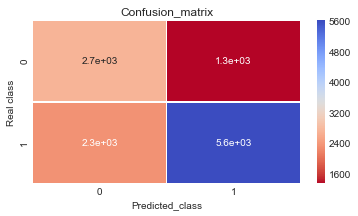

Accuracy:  0.6944421298225147

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.67      0.60      4062
           1       0.81      0.71      0.75      7939

   micro avg       0.69      0.69      0.69     12001
   macro avg       0.67      0.69      0.68     12001
weighted avg       0.72      0.69      0.70     12001



In [93]:
score_report(df_test['SURVIVE2'],y_pred)

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

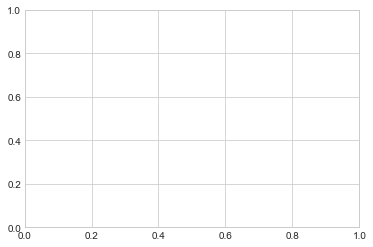

In [98]:
line1, = plt.plot([32, 64, 100, 200], n_acc, 'b', label="CV min accuracy")
line2, = plt.plot([32, 64, 100, 200], n_acc, 'b', label="CV min auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Cross Validation Error")
plt.xlabel("n estimators")
plt.show()

**NN 히든 레이어 크기 정하기**
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [88]:
#MLP 분류기 CV 검증
nn_scores = np.zeros(10)
kf = KFold(10, shuffle=True, random_state=0)
#
for i, (idx_train, idx_test) in enumerate(kf.split(data)):
    df_train = data.iloc[idx_train]
    df_test = data.iloc[idx_test]
    
    #샘플링 함수 선택 
    X1, y1 = undersampling(df_train.drop('SURVIVE2',axis=1),df_train['SURVIVE2'],)
    #input 395, ouput 1, mean = 148, <-히든 레이어 뉴런 개수로 사용
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=(148), random_state=1)
    clf.fit(X1,y1)
    
    y_pred = clf.predict(df_test.drop('SURVIVE2',axis=1))
    
    print(i,': ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
    
    nn_scores[i] = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
    #score_report(df_test['SURVIVE2'],y_pred)
print(nn_scores)

0 :  0.6504749208465256
1 :  0.6581403099483419
2 :  0.665305782369605
3 :  0.6333638863428047
4 :  0.6710274143821349
5 :  0.35338721773185566
6 :  0.6589450879093409
7 :  0.6341138238480126
8 :  0.614115490375802
9 :  0.3618865094575452
[0.65047492 0.65814031 0.66530578 0.63336389 0.67102741 0.35338722
 0.65894509 0.63411382 0.61411549 0.36188651]


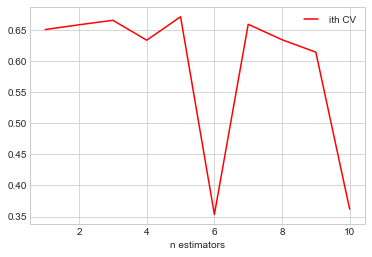

In [101]:
line1, = plt.plot([1,2,3,4,5,6,7,8,9,10], nn_scores, 'r', label="ith CV")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel("n estimators")
plt.show()

0  acc:  0.6705549075154141
0  auc:  0.6739681850223944
TP 5314
TN 2734
FP 1262
FN 2692


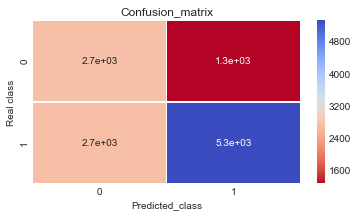

Accuracy:  0.6705549075154141

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.68      0.58      3996
           1       0.81      0.66      0.73      8006

   micro avg       0.67      0.67      0.67     12002
   macro avg       0.66      0.67      0.65     12002
weighted avg       0.71      0.67      0.68     12002

1  acc:  0.7106315614064322
1  auc:  0.7030979853707713
TP 5835
TN 2694
FP 1262
FN 2211


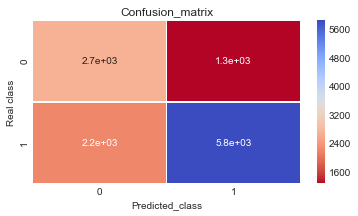

Accuracy:  0.7106315614064322

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.68      0.61      3956
           1       0.82      0.73      0.77      8046

   micro avg       0.71      0.71      0.71     12002
   macro avg       0.69      0.70      0.69     12002
weighted avg       0.73      0.71      0.72     12002

2  acc:  0.7321279786702216
2  auc:  0.7107910821712793
TP 6191
TN 2596
FP 1421
FN 1794


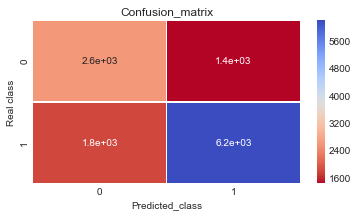

Accuracy:  0.7321279786702216

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      4017
           1       0.81      0.78      0.79      7985

   micro avg       0.73      0.73      0.73     12002
   macro avg       0.70      0.71      0.71     12002
weighted avg       0.74      0.73      0.73     12002

3  acc:  0.6791934005499541
3  auc:  0.6865740351898824
TP 5289
TN 2862
FP 1174
FN 2676


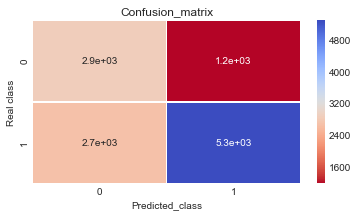

Accuracy:  0.6791934005499541

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.71      0.60      4036
           1       0.82      0.66      0.73      7965

   micro avg       0.68      0.68      0.68     12001
   macro avg       0.67      0.69      0.67     12001
weighted avg       0.72      0.68      0.69     12001

4  acc:  0.6766102824764603
4  auc:  0.6832574565738975
TP 5328
TN 2792
FP 1180
FN 2701


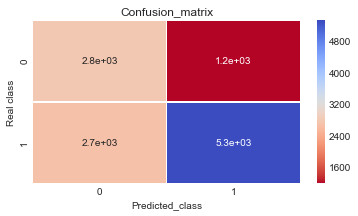

Accuracy:  0.6766102824764603

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.70      0.59      3972
           1       0.82      0.66      0.73      8029

   micro avg       0.68      0.68      0.68     12001
   macro avg       0.66      0.68      0.66     12001
weighted avg       0.72      0.68      0.69     12001

5  acc:  0.6831930672443963
5  auc:  0.6840968469176342
TP 5440
TN 2759
FP 1258
FN 2544


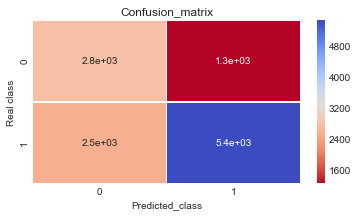

Accuracy:  0.6831930672443963

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.69      0.59      4017
           1       0.81      0.68      0.74      7984

   micro avg       0.68      0.68      0.68     12001
   macro avg       0.67      0.68      0.67     12001
weighted avg       0.71      0.68      0.69     12001

6  acc:  0.6896091992333973
6  auc:  0.6861664202735026
TP 5536
TN 2740
FP 1316
FN 2409


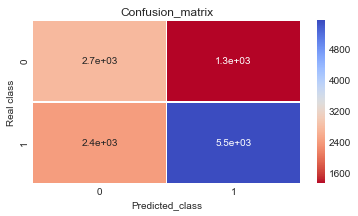

Accuracy:  0.6896091992333973

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.68      0.60      4056
           1       0.81      0.70      0.75      7945

   micro avg       0.69      0.69      0.69     12001
   macro avg       0.67      0.69      0.67     12001
weighted avg       0.71      0.69      0.70     12001

7  acc:  0.6612782268144322
7  auc:  0.6691573475917897
TP 5127
TN 2809
FP 1242
FN 2823


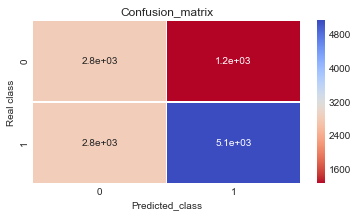

Accuracy:  0.6612782268144322

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.69      0.58      4051
           1       0.80      0.64      0.72      7950

   micro avg       0.66      0.66      0.66     12001
   macro avg       0.65      0.67      0.65     12001
weighted avg       0.70      0.66      0.67     12001

8  acc:  0.6923589700858261
8  auc:  0.6890415293097549
TP 5590
TN 2719
FP 1285
FN 2407


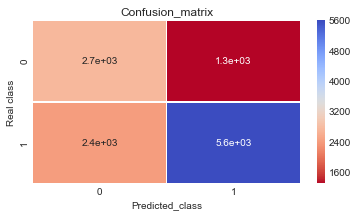

Accuracy:  0.6923589700858261

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.68      0.60      4004
           1       0.81      0.70      0.75      7997

   micro avg       0.69      0.69      0.69     12001
   macro avg       0.67      0.69      0.67     12001
weighted avg       0.72      0.69      0.70     12001

9  acc:  0.638446796100325
9  auc:  0.6520698911177045
TP 4842
TN 2820
FP 1242
FN 3097


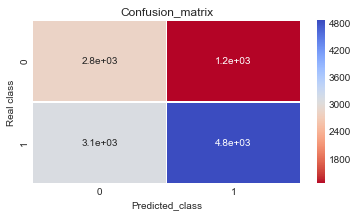

Accuracy:  0.638446796100325

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.69      0.57      4062
           1       0.80      0.61      0.69      7939

   micro avg       0.64      0.64      0.64     12001
   macro avg       0.64      0.65      0.63     12001
weighted avg       0.69      0.64      0.65     12001

[0.67055491 0.71063156 0.73212798 0.6791934  0.67661028 0.68319307
 0.6896092  0.66127823 0.69235897 0.6384468 ]


In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#boost CV 검증
bagging_scores = np.zeros(10)
kf = KFold(10, shuffle=True, random_state=0)
#트리 기반 모델은 더미화 필요 없음으로 kf.split(raw_data)으로 진행
for i, (idx_train, idx_test) in enumerate(kf.split(data)):
    df_train = data.iloc[idx_train]
    df_test = data.iloc[idx_test]
    
    #샘플링 함수 선택 
    X1, y1 = undersampling(df_train.drop('SURVIVE2',axis=1),df_train['SURVIVE2'],)
    bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
    bagging.fit(X1,y1)

    
    y_pred = bagging.predict(df_test.drop('SURVIVE2',axis=1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test['SURVIVE2'], y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    
    #너무 느려 ㅜ
    print(i,' acc: ',accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True))
    print(i,' auc: ',roc_auc)
    score_report(df_test['SURVIVE2'],y_pred)
    bagging_scores[i] = accuracy_score(df_test['SURVIVE2'],y_pred,normalize=True)
    #score_report(df_test['SURVIVE2'],y_pred)
print(bagging_scores)

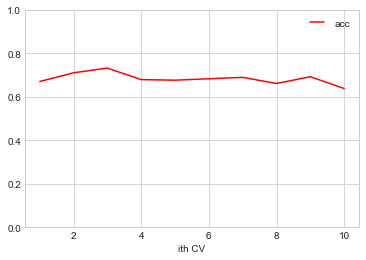

In [109]:
line1, = plt.plot([1,2,3,4,5,6,7,8,9,10], bagging_scores, 'r', label="acc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylim([0,1])
plt.xlabel("ith CV")
plt.show()

In [90]:
#예측
# a = 
# b = 
# c = 
# rf.predict()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [102]:
#rf 저장
import pickle
with open('rf_DM.pickle', 'wb') as f:
    pickle.dump(rf,f)

In [160]:
temp = data.iloc[2791:2792]
temp.drop('SURVIVE2',axis=1)

,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,연령대 30 상주인구 수,연령대 40 상주인구 수,연령대 50 상주인구 수,연령대 60 이상 상주인구 수,남성연령대 10 상주인구 수,...,흑석동,양식집,일식집,제과점,중국집,치킨집,커피음료,패스트푸드점,한식음식점,호프간이주점
2791,24646.85714,11625.11905,13021.7381,4251.595238,2973.595238,4823.166667,4194.642857,3496.261905,4907.595238,2135.785714,...,0,0,0,0,0,0,0,0,1,0


In [161]:
temp2 = data.iloc[157:158]
temp2.drop('SURVIVE2',axis=1)

,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,연령대 30 상주인구 수,연령대 40 상주인구 수,연령대 50 상주인구 수,연령대 60 이상 상주인구 수,남성연령대 10 상주인구 수,...,흑석동,양식집,일식집,제과점,중국집,치킨집,커피음료,패스트푸드점,한식음식점,호프간이주점
157,40951.0,20125.7619,20825.2381,7202.642857,6098.333333,6695.571429,6582.142857,6935.285714,7437.02381,3755.642857,...,0,0,0,0,0,0,0,0,1,0


In [128]:
len(df_test.drop('SURVIVE2',axis=1).iloc[0])

446

In [155]:
#옥수동 한식음식점
rf.predict(temp.drop('SURVIVE2',axis=1))

array([1], dtype=int64)

In [165]:
rf.predict_proba(temp.drop('SURVIVE2',axis=1))

array([[0., 1.]])

In [162]:
#가락도 한식음식점
rf.predict(temp2.drop('SURVIVE2',axis=1))

array([0], dtype=int64)

In [164]:
rf.predict_proba(temp2.drop('SURVIVE2',axis=1))

array([[0.88, 0.12]])